In [200]:
#Libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime, timedelta
import yfinance as yf
from scipy.stats import linregress


In [201]:
#Timeframe and Data Scraping
end_date = datetime.today()
start_date = end_date - timedelta(days = 365 * 2)
#Holding = Stock Ticker
holding_Ticker= ['CBA.AX']
Holding_Name = 'CBA'
for holding_Ticker in holding_Ticker:
    df_holding = yf.download(holding_Ticker, start=start_date, end=end_date)
#Benchmark = Index
index = ['SFY.XA']
for index in index:
    df_index = yf.download(index, start=start_date, end=end_date)
df_holding['Returns'] = df['Adj Close'].pct_change()
df_holding['Returns'].dropna()
df_index.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-18,59.330002,59.330002,58.900002,59.299999,55.705257,2791
2022-07-19,59.630001,59.630001,58.980000,59.049999,55.470413,0
2022-07-20,59.930000,60.049999,59.630001,59.869999,56.240707,0
2022-07-21,59.830002,59.849998,59.759998,59.820000,56.193729,0
2022-07-22,59.889999,60.330002,59.889999,60.110001,56.466156,0


In [202]:
#Calculating R variables
max_r = df_holding['Returns'].min()
min_r = df_holding['Returns'].max()
avg_r = df_holding['Returns'].mean()
y = [min_r, avg_r, max_r]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


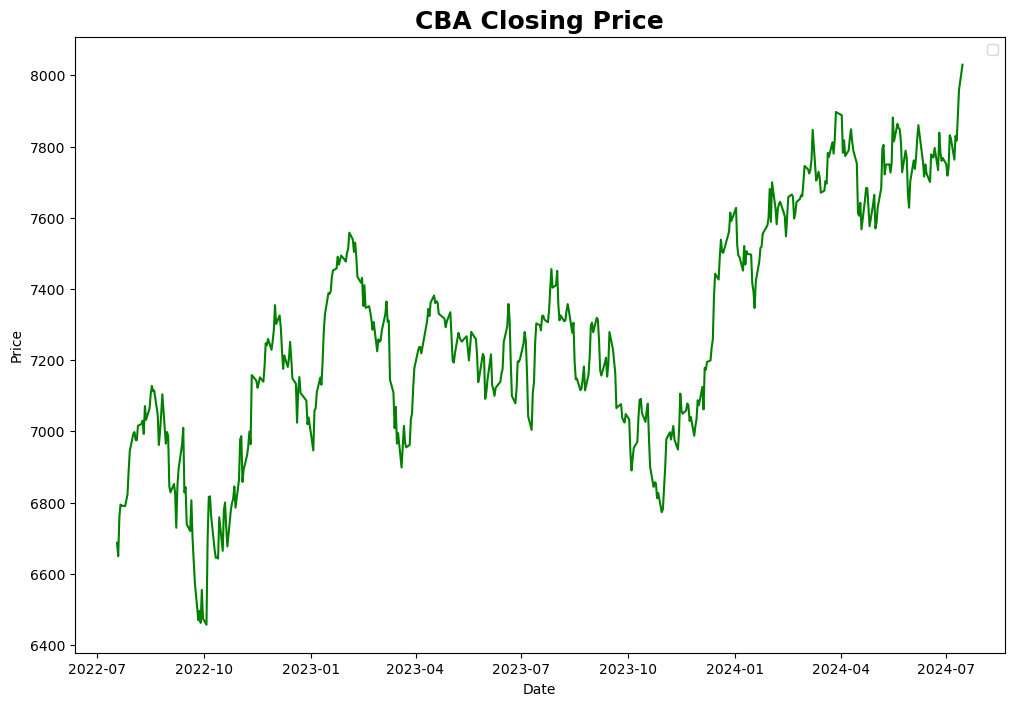

In [203]:
#Plotting CBA Closing Price 
plt.figure(figsize=(12,8))
plt.plot(df['Adj Close'], color='green')
plt.title(Holding_Name + ' Closing Price', fontsize=18, fontweight='bold')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [204]:
#Normalising XJO and Stock
df_index['Normalize'] = df_index['Adj Close']/df_index['Adj Close'][0]
df_holding['Normalize'] = df_holding['Adj Close']/df_holding['Adj Close'][0]

C:\Users\lenny\AppData\Local\Temp\ipykernel_77328\2463938926.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_index['Normalize'] = df_index['Adj Close']/df_index['Adj Close'][0]
C:\Users\lenny\AppData\Local\Temp\ipykernel_77328\2463938926.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_holding['Normalize'] = df_holding['Adj Close']/df_holding['Adj Close'][0]


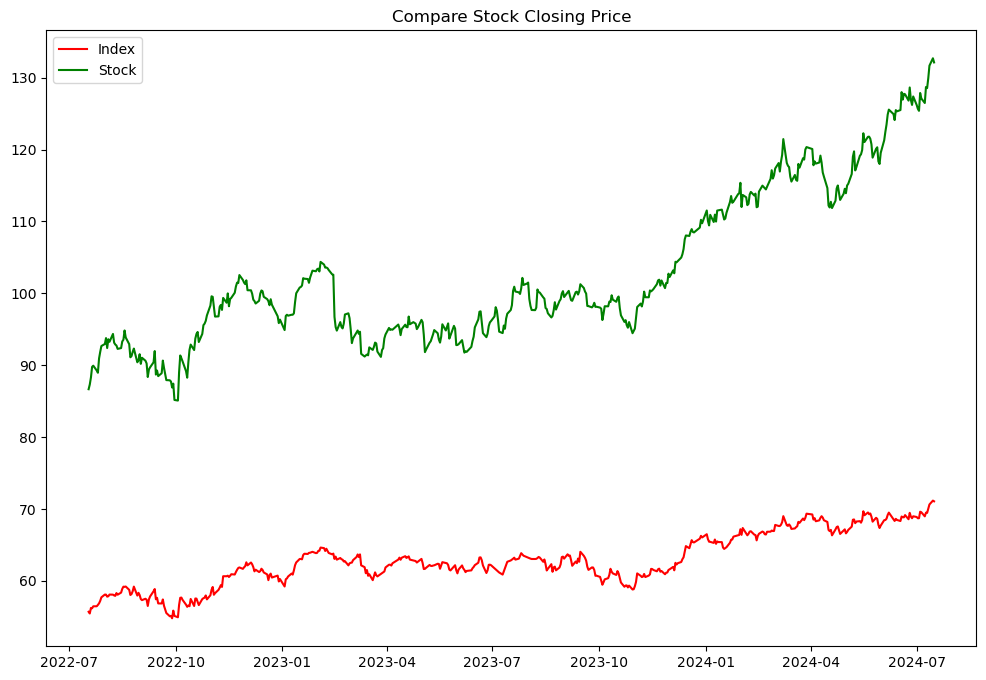

In [205]:
#Plot XJO and CBA 
plt.figure(figsize=(12,8))
plt.plot(df_index['Adj Close'], color='red', label='Index')
plt.plot(df_holding['Adj Close'], color='green', label='Stock')
plt.title('Compare Stock Closing Price')
plt.legend(loc='best')
plt.show()

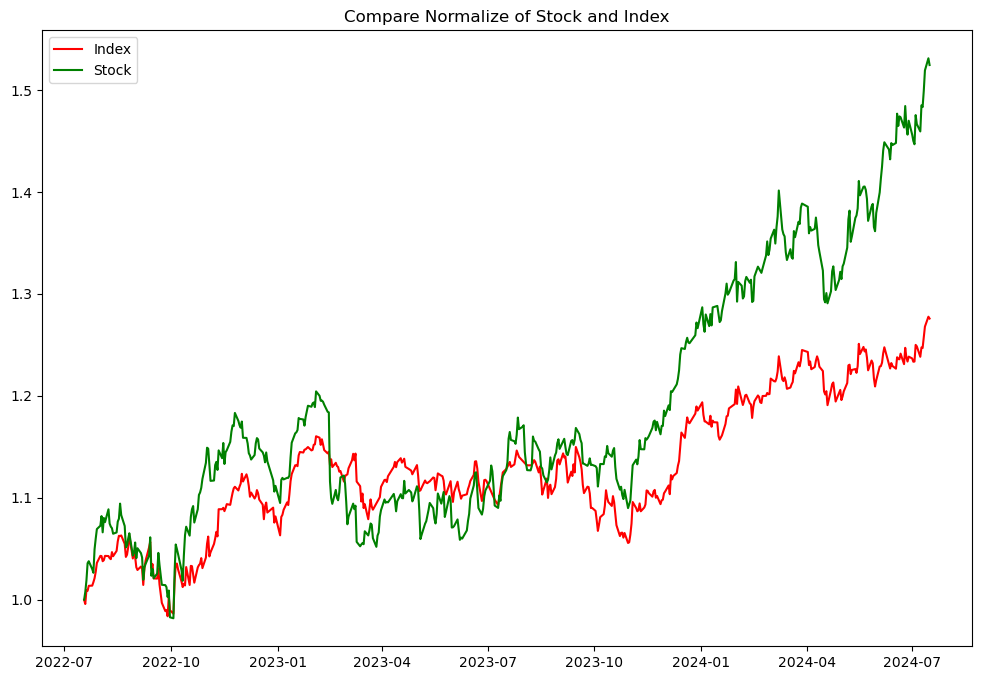

In [206]:
#Comparing Stock and Index (Normalized)
plt.figure(figsize=(12,8))
plt.plot(df_index['Normalize'], color='red', label='Index')
plt.plot(df_holding['Normalize'], color='green', label='Stock')
plt.title("Compare Normalize of Stock and Index")
plt.legend(loc='best')
plt.show()

In [207]:
#Max, min and mean 
df_holding['Max5'] = df_holding['Adj Close'].rolling(5).max()
df_holding['Min5'] = df_holding['Adj Close'].rolling(5).min()
df_holding['Avg5'] = df_holding['Adj Close'].rolling(5).mean()

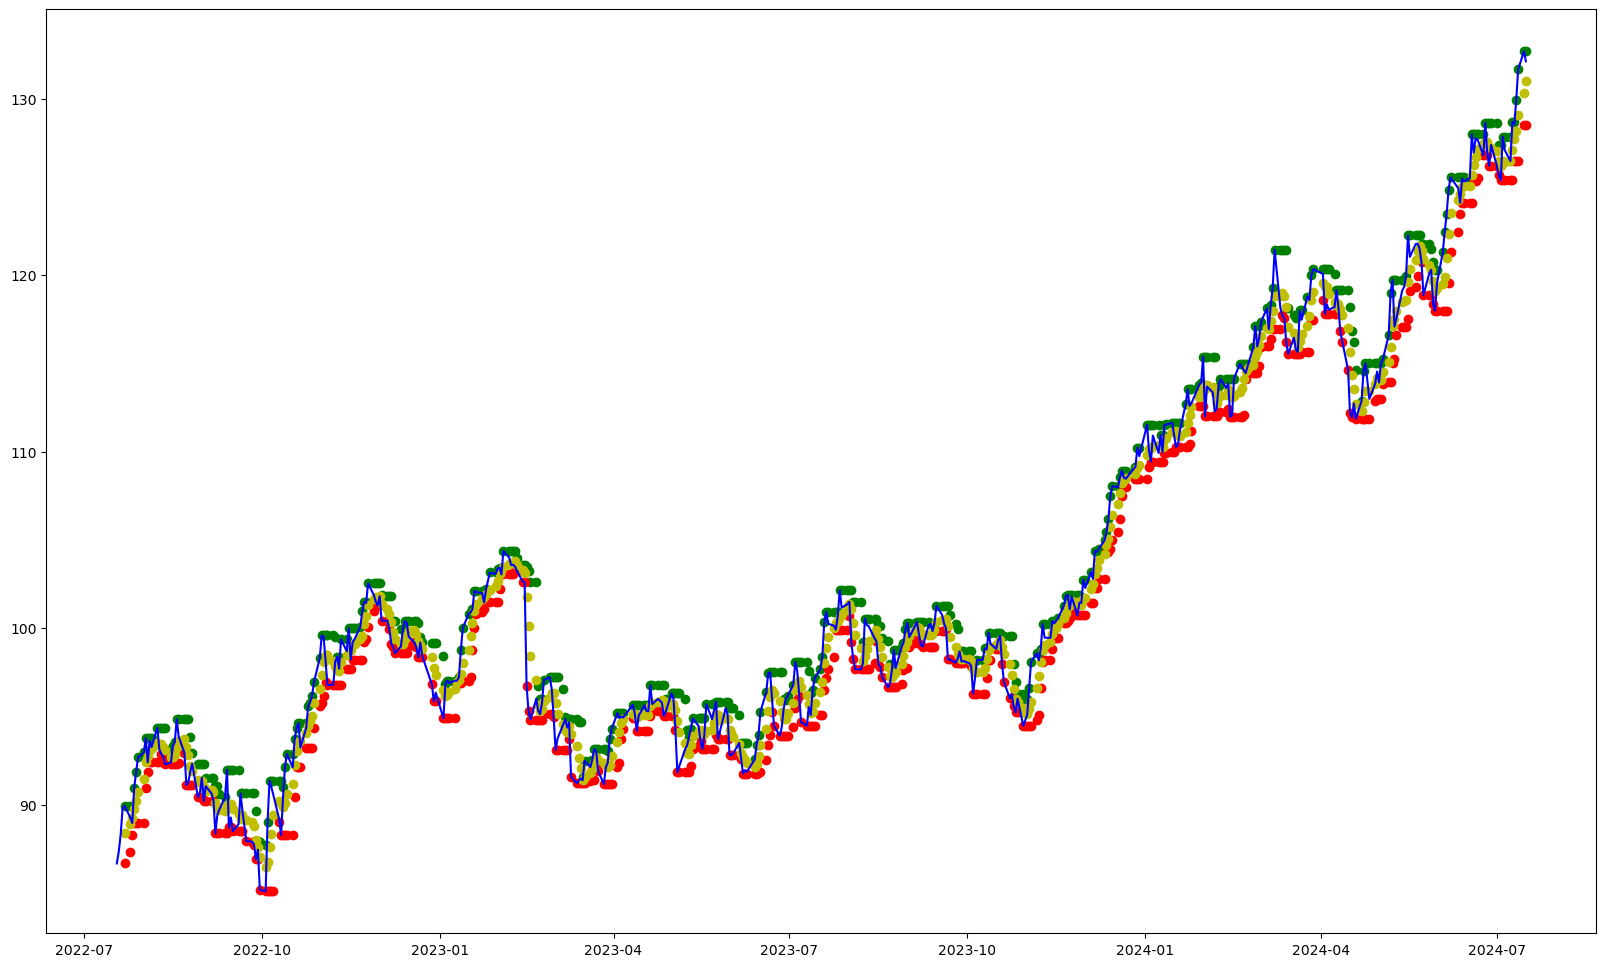

In [208]:
#Politting Min, max and average
plt.figure(figsize=(20,12))
plt.plot(df_holding['Max5'],'go')
plt.plot(df_holding['Min5'],'ro')
plt.plot(df_holding['Avg5'],'yo')
plt.plot(df_holding['Adj Close'], color='blue', label='Holding_Name')
plt.show()

In [209]:
#Mean, median and mode
df_index['Adj Close'].index.max()
max_price_stock = df_holding['Adj Close'].max()
min_price_stock = df_holding['Adj Close'].min()
avg_price_stock = df_holding['Adj Close'].mean()
median_price_stock = df_holding['Adj Close'].median()
mode_price_stock = df_holding['Adj Close'].mode()
adj_close = df_holding[['Adj Close']].reset_index()
adj_close.head()
adj_close_max = adj_close[['Date', 'Adj Close']].max()
adj_close_max
df_holding['Adj Close'].idxmax()
df_holding['Adj Close'].idxmin()
df_holding['Adj Close'].mean(axis=0)

102.53677653699818

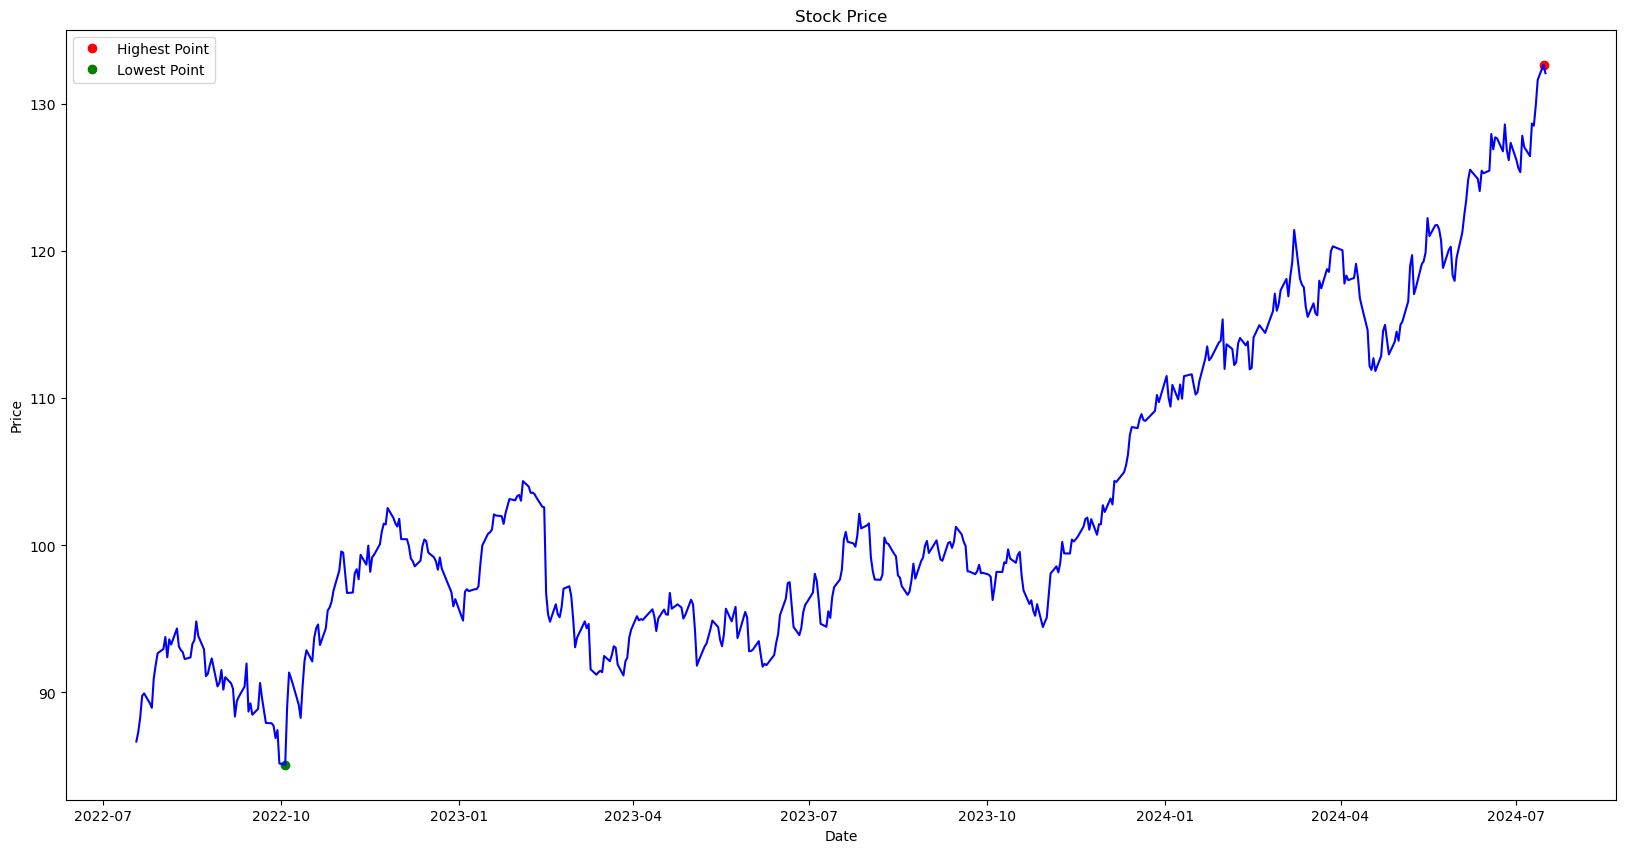

In [210]:
#Connecting high and lows'
plt.figure(figsize=(20,10))
plt.plot(df_holding['Adj Close'].idxmax(), df_holding['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(df_holding['Adj Close'].idxmin(), df_holding['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(df_holding['Adj Close'], color='blue')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

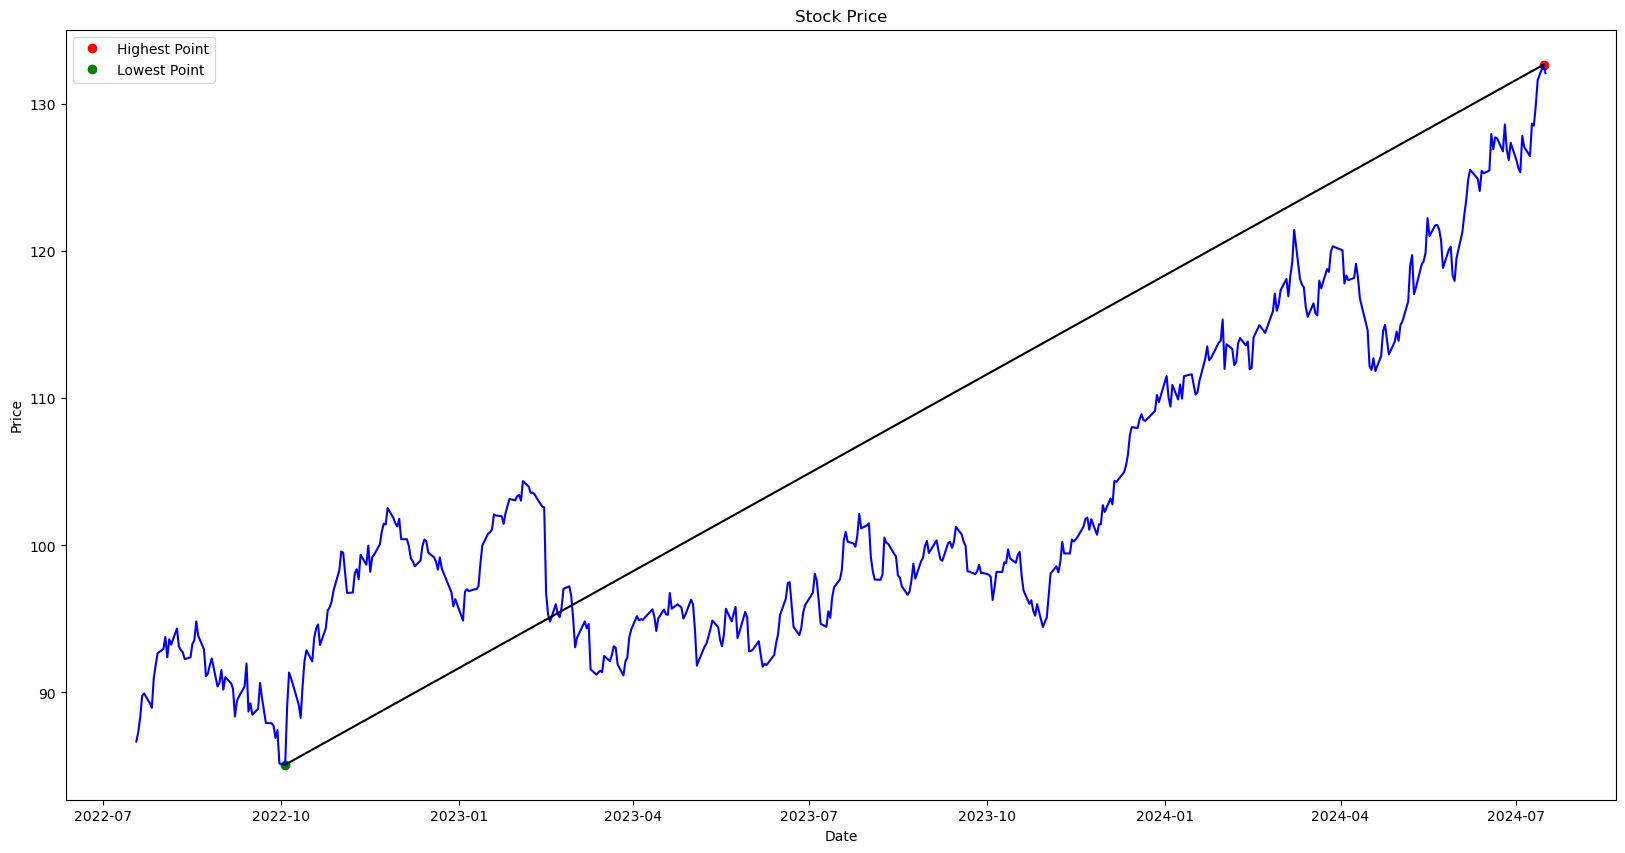

In [211]:
#Connecting points
def connectpoints():
    x1, x2 = df_holding['Adj Close'].idxmin(), df_holding['Adj Close'].idxmax()
    y1, y2 = df_holding['Adj Close'].min(), df_holding['Adj Close'].max()
    plt.plot([x1,x2],[y1,y2],'k-')
    return

plt.figure(figsize=(20,10))
plt.plot(df_holding['Adj Close'].idxmax(), df_holding['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(df_holding['Adj Close'].idxmin(), df_holding['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(df_holding['Adj Close'], color='blue')
connectpoints()
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

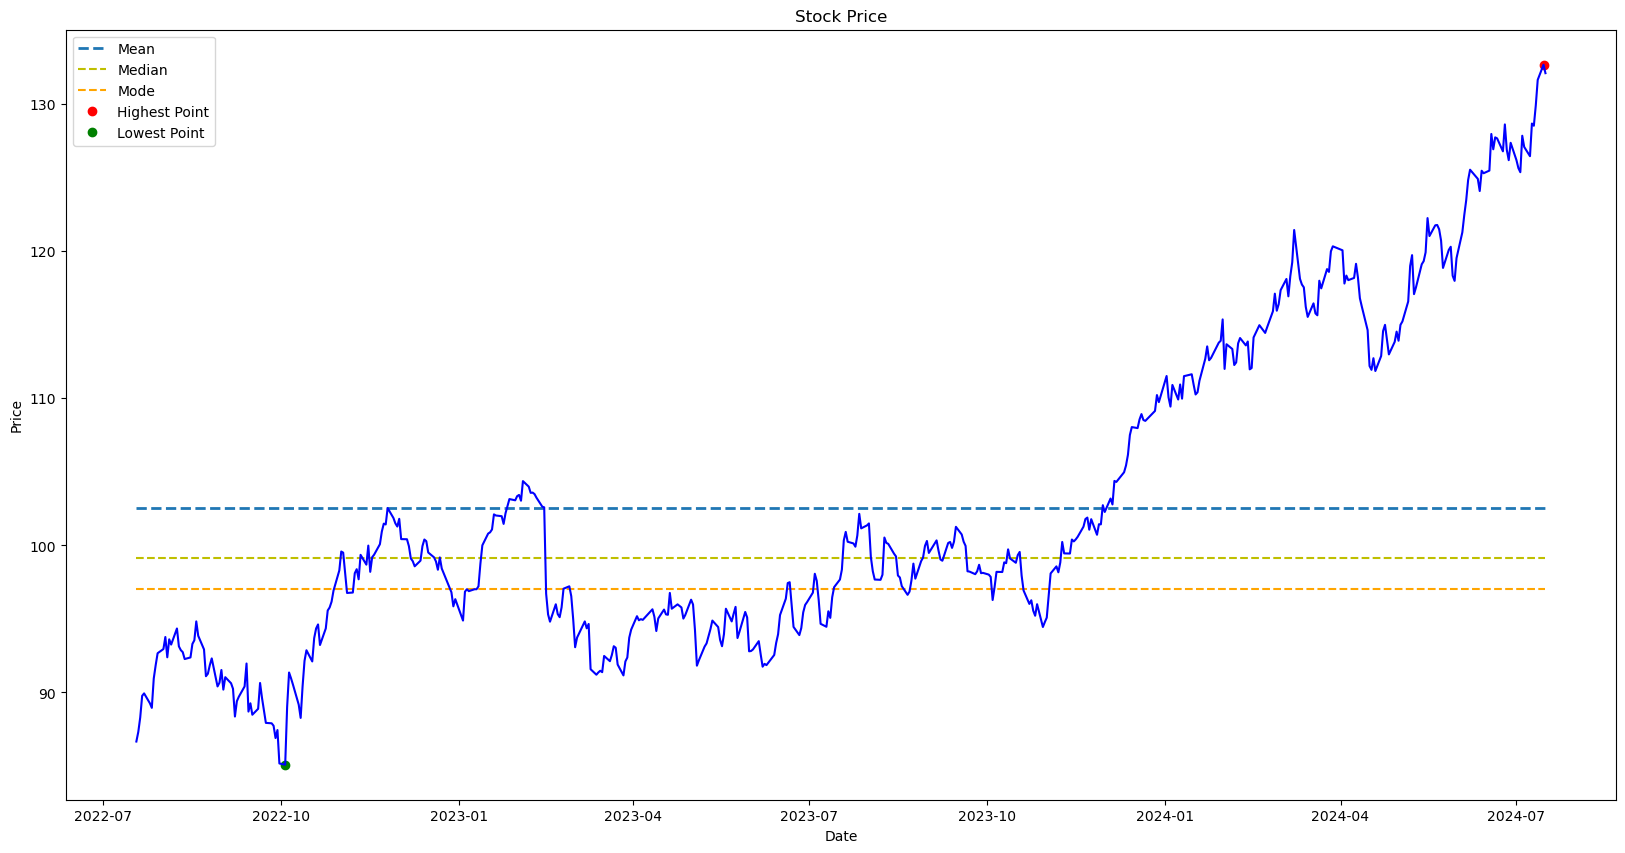

In [212]:
# Plot Horizontal Lines
plt.figure(figsize=(20,10))
plt.hlines(df_holding['Adj Close'].mean(), xmin=df_holding.index[0], xmax=df_holding.index[-1], linewidth=2, label='Mean', linestyle='--')
plt.hlines(df_holding['Adj Close'].median(), xmin=df_holding.index[0], xmax=df_holding.index[-1], color='y', label='Median', linestyle='--')
plt.hlines(df_holding['Adj Close'].mode(), xmin=df_holding.index[0], xmax=df_holding.index[-1], color='orange', label='Mode', linestyle='--')
plt.plot(df_holding['Adj Close'].idxmax(), df_holding['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(df_holding['Adj Close'].idxmin(), df_holding['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(df_holding['Adj Close'], color='blue')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

Slope 0.06215234288533723
Normalized Mean Squared Error (NRMSE): 0.11882080438367607


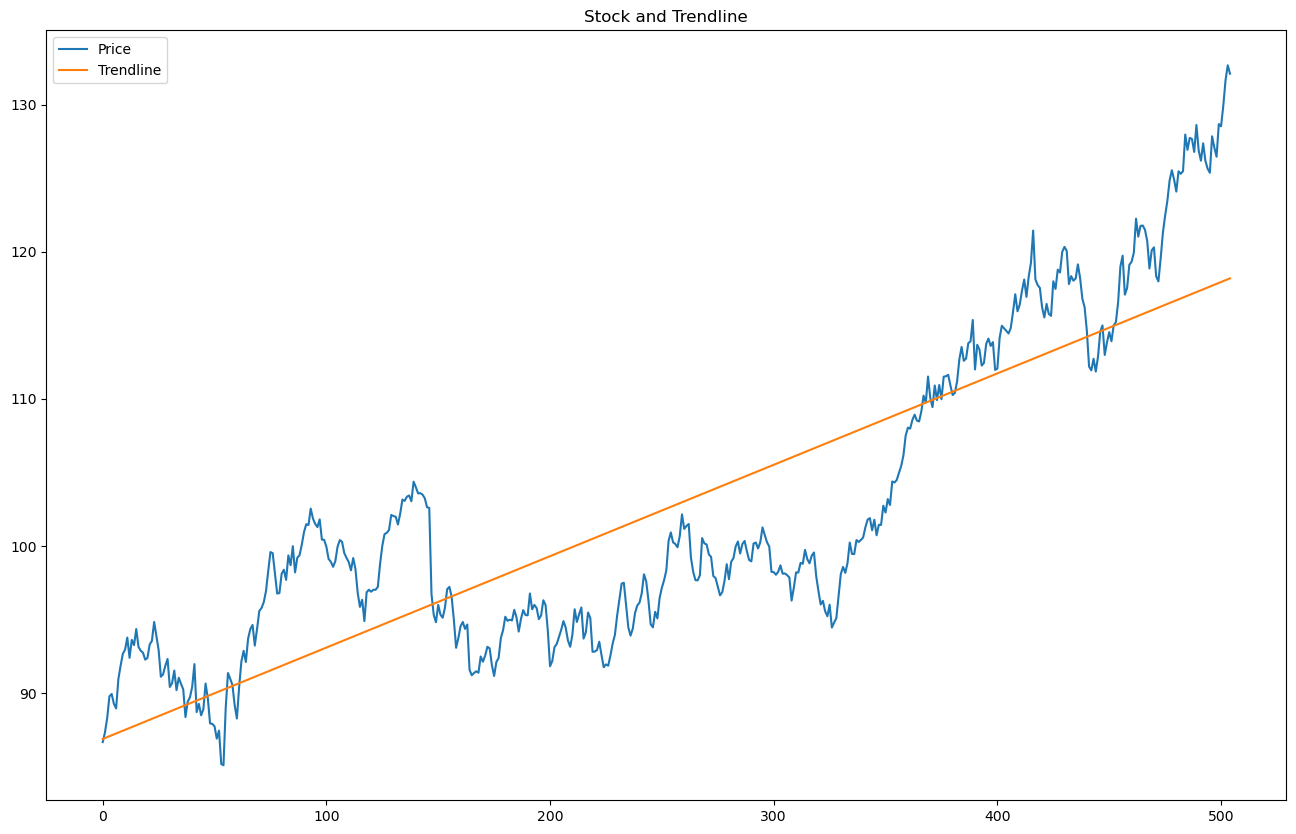

In [213]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(df_holding.index)), df_holding['Adj Close'],1, full=True)

mse = residuals[0]/(len(df_holding.index))
nrmse = np.sqrt(mse)/(df_holding['Adj Close'].max() - df_holding['Adj Close'].min())
print('Slope ' + str(coefficients[0]))
print('Normalized Mean Squared Error (NRMSE): ' + str(nrmse))
plt.figure(figsize=(16,10))
plt.plot(df_holding['Adj Close'].values, label='Price')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(df_holding))], label='Trendline')
plt.title('Stock and Trendline')
plt.legend(loc='best')
plt.show()